# Identify and deal with outliers

## Objective

I will be analyzing lightning strike data obtained from the National Oceanic and Atmospheric Administration (NOAA) spanning the years 1987 to 2020 for my project document. To manage the extensive dataset, which consists of millions of rows, I've undertaken preprocessing to streamline the information, retaining only the year and the corresponding count of lightning strikes.

The primary objective of my project is to explore the variation in total lightning strike counts for each year and pinpoint any outliers within the dataset. Subsequently, I intend to visually represent the annual totals by creating a scatterplot for a more comprehensive understanding of the patterns over the examined period.

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [48]:
# Read in data
df = pd.read_csv('eda_outliers_dataset1.csv')

In [49]:
# Print first 10 rows
df.head(10)

,year,number_of_strikes
0,2020,15620068
1,2019,209166
2,2018,44600989
3,2017,35095195
4,2016,41582229
5,2015,37894191
6,2014,34919173
7,2013,27600898
8,2012,28807552
9,2011,31392058


Convert the number of strikes value to a more readable format on the graph (e.g., converting 100,000 to 100K, 3,000,000 to 3M, and so on).

In [50]:
def readable_numbers(x):
    """takes a large number and formats it into K,M to make it more readable"""
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

# Use the readable_numbers() function to create a new column 
df['number_of_strikes_readable']=df['number_of_strikes'].apply(readable_numbers)

In [51]:
df.head(10)

,year,number_of_strikes,number_of_strikes_readable
0,2020,15620068,15.6M
1,2019,209166,209K
2,2018,44600989,44.6M
3,2017,35095195,35.1M
4,2016,41582229,41.6M
5,2015,37894191,37.9M
6,2014,34919173,34.9M
7,2013,27600898,27.6M
8,2012,28807552,28.8M
9,2011,31392058,31.4M


In [52]:
print("Mean:" + readable_numbers(np.mean(df['number_of_strikes'])))
print("Median:" + readable_numbers(np.median(df['number_of_strikes'])))

Mean:26.8M
Median:28.3M


I'll utilize a boxplot as a visual tool to effectively analyze data distribution by percentiles and quartiles. These are key summary statistics that provide valuable insights into the dataset. The central shaded portion of the box in the boxplot signifies the middle 50th percentile of the data points, encapsulating what is known as the interquartile range (IQR).

The boxplot includes "whiskers" that extend to 1.5 times the IQR by default. These whiskers help identify the range of the data and highlight any potential outliers beyond the typical range. This graphical representation will contribute to a clearer understanding of the distribution and variability of the data in the context of my project analysis.

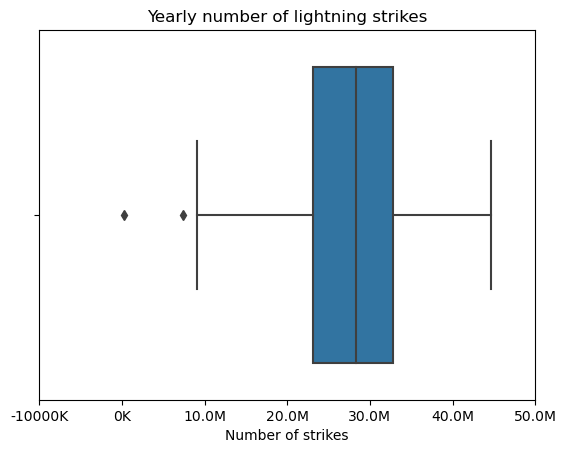

In [53]:
# Create boxplot
box = sns.boxplot(x=df['number_of_strikes'])

# Get current axis
g = plt.gca() # Get the current Axes instance from the Matplotlib pyplot module and store it in the variable g.

# Set x-axis tick positions and labels
xticks = g.get_xticks() # Get the x-axis tick positions from the current Axes (g) and store them in the variable xticks.
box.set_xticks(xticks) #Set the x-axis tick positions of the boxplot to the values obtained in the previous step (xticks).
box.set_xticklabels(np.array([readable_numbers(x) for x in xticks]))

plt.xlabel('Number of strikes')
plt.title('Yearly number of lightning strikes')
plt.show()

The points to the left of the left whisker are outliers.  
Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.



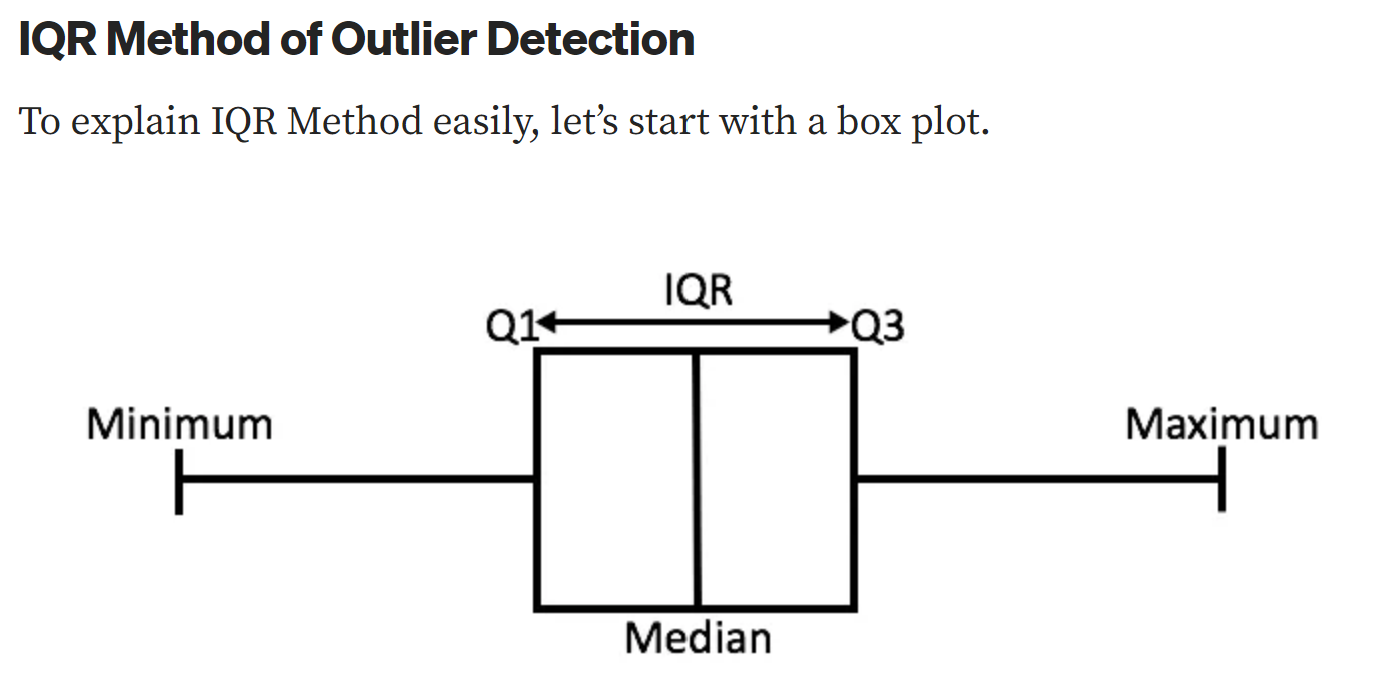

A box plot tells us, more or less, about the distribution of the data. It gives a sense of how much the data is actually spread about, what’s its range, and about its skewness. As you might have noticed in the figure, that a box plot enables us to draw inference from it for an ordered data, i.e., it tells us about the various metrics of a data arranged in ascending order.

In the above figure,
* minimum is the minimum value in the dataset,
* and maximum is the maximum value in the dataset.

So the difference between the two tells us about the range of dataset.
* The median is the median (or centre point), also called second quartile, of the data (resulting from the fact that the data is ordered).
* Q1 is the first quartile of the data, i.e., to say 25% of the data lies between minimum and Q1.
* Q3 is the third quartile of the data, i.e., to say 75% of the data lies between minimum and Q3.

The difference between Q3 and Q1 is called the Inter-Quartile Range or IQR.

**IQR = Q3 - Q1**

To detect the outliers using this method, we define a new range, let’s call it decision range, and any data point lying outside this range is considered as outlier and is accordingly dealt with. The range is as given below:

Lower Bound: **(Q1 - 1.5 * IQR)** (Lower limit)  
Upper Bound: **(Q3 + 1.5 * IQR)** (Upper limit)   

Any data point less than the Lower Bound or more than the Upper Bound is considered as an **outlier**.

Reference: 
https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097

Define IQR, upper, and lower limit.

In [54]:
# Calculate 25th percentile of annual strikes
percentile25 = df['number_of_strikes'].quantile(0.25)

# Calculate 75th percentile of annual strikes
percentile75 = df['number_of_strikes'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
lower_limit = percentile25 - 1.5 * iqr
upper_limit = percentile75 + 1.5 * iqr

print('Lower limit is: '+ readable_numbers(lower_limit))
print('Upper limit is: '+ readable_numbers(upper_limit))

Lower limit is: 8.6M
Upper limit is: 47.4M


Use a Boolean mask to select only the rows of the dataframe where the number of strikes is less than the lower limit we calculated above. These rows are the outliers on the lower end.

In [55]:
# Isolate outliers on lower end
df[df['number_of_strikes'] < lower_limit]

,year,number_of_strikes,number_of_strikes_readable
1,2019,209166,209K
33,1987,7378836,7.4M


In [56]:
# Isolate outliers on upper end
df[df['number_of_strikes'] > upper_limit]
# From the result we do not see any outliers

,year,number_of_strikes,number_of_strikes_readable


Get a visual of all of the data points with the outlier values colored red.

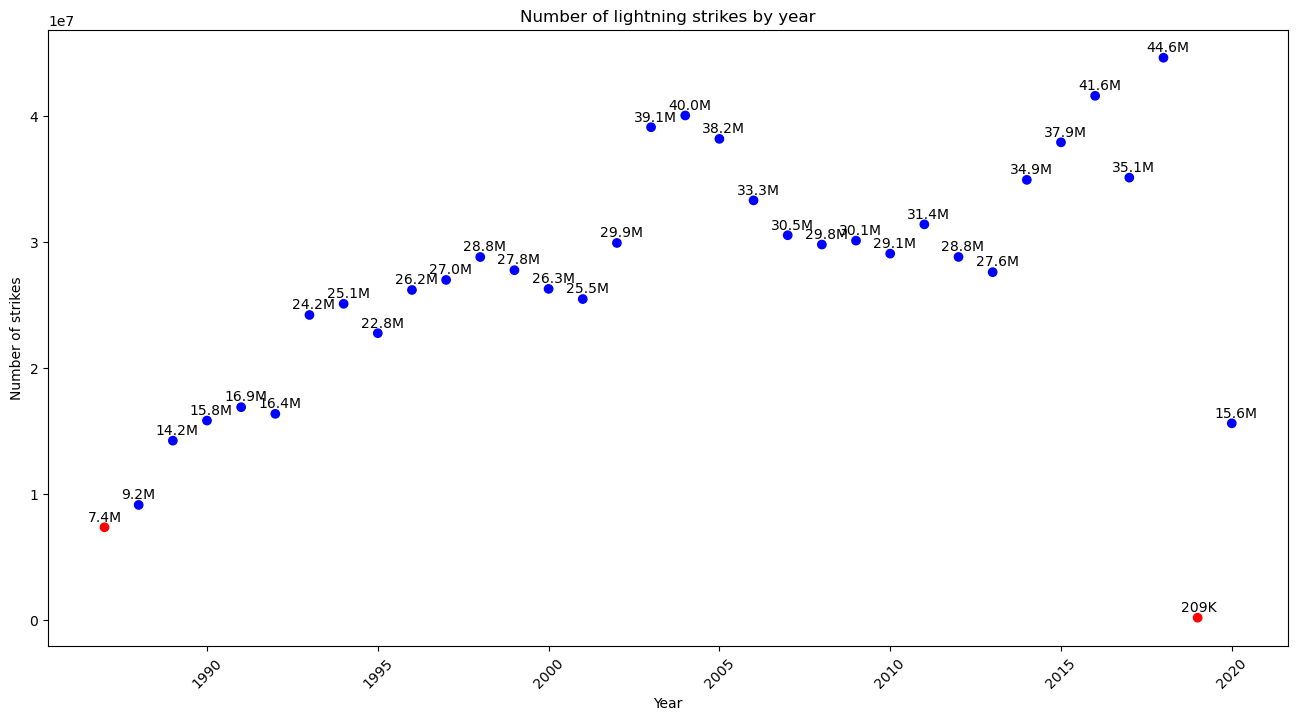

In [57]:
# Show different color for outliers
colors = np.where(df['number_of_strikes'] < lower_limit, 'r', 'b')

plt.figure(figsize=(16, 8))
plt.scatter(df['year'], df['number_of_strikes'], c=colors)
plt.xlabel('Year')
plt.ylabel('Number of strikes')
plt.title('Number of lightning strikes by year')

# Rotate every other label for better readability
plt.xticks(rotation=45)

# Add labels for each data point
for i, (x, y) in enumerate(zip(df['year'], df['number_of_strikes'])):
    plt.text(x - 0.5, y + 500000, s=readable_numbers(y))

### Investigating the outliers 2019 and 1987

Examine the two outlier years a bit more closely. In the section above, I used a preprocessed dataset that didn't include a lot of the information that we're accustomed to having in this data. In order to further investigate the outlier years, more information is required, do so by importing data from these years specifically.

#### Import data for 2019

In [58]:
df_2019 = pd.read_csv('eda_outliers_dataset2.csv')

In [59]:
df_2019.head()

,date,number_of_strikes,center_point_geom
0,2019-12-01,1,POINT(-79.7 35.3)
1,2019-12-01,1,POINT(-84.7 39.3)
2,2019-12-01,1,POINT(-83.4 38.9)
3,2019-12-01,1,POINT(-71.5 35.2)
4,2019-12-01,1,POINT(-87.8 41.6)


Convert the `date` column to datetime. This allows extracting two new columns: `month` and `month_txt`. Then, check year 2019 for the number of months contained.

In [60]:
# Convert `date` column to datetime
df_2019['date']= pd.to_datetime(df_2019['date'])

# Create 2 new columns
df_2019['month'] = df_2019['date'].dt.month
df_2019['month_txt'] = df_2019['date'].dt.month_name().str.slice(stop=3)

df_2019.head()


,date,number_of_strikes,center_point_geom,month,month_txt
0,2019-12-01,1,POINT(-79.7 35.3),12,Dec
1,2019-12-01,1,POINT(-84.7 39.3),12,Dec
2,2019-12-01,1,POINT(-83.4 38.9),12,Dec
3,2019-12-01,1,POINT(-71.5 35.2),12,Dec
4,2019-12-01,1,POINT(-87.8 41.6),12,Dec


Check the count of values for each month in year 2019 and sort by month.

In [61]:
df_1987['month_txt'].value_counts()

month_txt
Aug    332540
Jul    298028
Sep    239564
Jun    197626
May    129497
Apr     51006
Nov     50261
Mar     43147
Oct     37978
Feb     27338
Dec     20810
Jan     13439
Name: count, dtype: int64

2019 appears to have data only for the month of December. The likelihood of there not being any lightning from January to November 2019 is ~0. This appears to be a case of missing data. We should probably exclude 2019 from the analysis (for most use cases).

#### Import data for 1987

Inspect the data from the other outlier year, 1987.


In [62]:
# Read in 1987 data
df_1987 = pd.read_csv('eda_outliers_dataset3.csv')

This code block use the same datetime conversions and groupings done previously for year 2019

In [63]:
# Convert `date` column to datetime
df_1987['date'] = pd.to_datetime(df_1987['date'])

# Create 2 new columns
df_1987['month'] = df_1987['date'].dt.month
df_1987['month_txt'] = df_1987['date'].dt.month_name().str.slice(stop=3)

df_1987.head()


,date,number_of_strikes,center_point_geom,month,month_txt
0,1987-01-01,21,POINT(-80.7 26),1,Jan
1,1987-01-04,23,POINT(-83.2 28.3),1,Jan
2,1987-01-05,40,POINT(-78.9 31.3),1,Jan
3,1987-01-05,20,POINT(-79.2 31.4),1,Jan
4,1987-01-05,21,POINT(-80.1 31.4),1,Jan


Check the count of values for each month in year 1987

In [64]:
df_1987['month_txt'].value_counts()

month_txt
Aug    332540
Jul    298028
Sep    239564
Jun    197626
May    129497
Apr     51006
Nov     50261
Mar     43147
Oct     37978
Feb     27338
Dec     20810
Jan     13439
Name: count, dtype: int64

1987 has data for every month of the year. Hence, this outlier should be treated differently than 2019, which is missing data. 

Run the mean and median after removing the outliers. 



In [65]:
# Recalculate mean and median values on data without outliers
print("Mean:" + readable_numbers(np.mean(df_without_outliers['number_of_strikes'])))
print("Median:" + readable_numbers(np.median(df_without_outliers['number_of_strikes'])))

Mean:28.2M
Median:28.8M


The outliers significantly affect the dataset's mean, but do not significantly affect the median. 

With outliers  
* Mean: 26.8M  
* Median: 28.3M

To remove the outliers, we'll use a Boolean mask to create a new dataframe that contains only the rows in the original dataframe where the number of strikes >= the lower limit we calculated above.

In [66]:
# Create new df that removes outliers
df_without_outliers = df[df['number_of_strikes'] >= lower_limit]

In [67]:
df_without_outliers

,year,number_of_strikes,number_of_strikes_readable
0,2020,15620068,15.6M
2,2018,44600989,44.6M
3,2017,35095195,35.1M
4,2016,41582229,41.6M
5,2015,37894191,37.9M
6,2014,34919173,34.9M
7,2013,27600898,27.6M
8,2012,28807552,28.8M
9,2011,31392058,31.4M
10,2010,29068965,29.1M


Now the new dataframe does not contain outliers which is year 2019 and 1987